In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

# K-means算法实现


初始聚类中心: [[0, 0], [1, 2]]

--- 第1次迭代 ---
聚类1: ['P1']
聚类2: ['P2', 'P3', 'P4', 'P5', 'P6']
新聚类中心: [[0 0]
 [6 5]]

--- 第2次迭代 ---
聚类1: ['P1', 'P2', 'P3']
聚类2: ['P4', 'P5', 'P6']
新聚类中心: [[1 1]
 [9 8]]

--- 第3次迭代 ---
聚类1: ['P1', 'P2', 'P3']
聚类2: ['P4', 'P5', 'P6']
新聚类中心: [[1 1]
 [9 8]]

聚类已收敛!


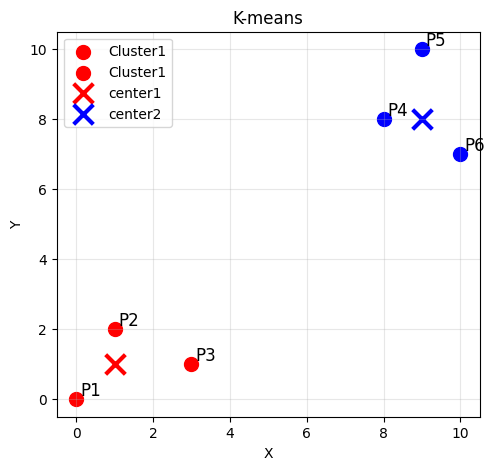

In [5]:
# 定义数据点
points = {
    'P1': [0, 0],
    'P2': [1, 2], 
    'P3': [3, 1],
    'P4': [8, 8],
    'P5': [9, 10],
    'P6': [10, 7]
}

# 转换为numpy数组
point_names = list(points.keys())
data = np.array(list(points.values()))

# 实现K-means算法
def kmeans_manual(data, initial_centers, max_iters=100):
    centers = np.array(initial_centers)
    n_clusters = len(initial_centers)
    
    print(f"\n初始聚类中心: {initial_centers}")
    
    for iteration in range(max_iters):
        print(f"\n--- 第{iteration + 1}次迭代 ---")
        
        # 步骤1: 分配点到最近的聚类中心
        distances = np.zeros((len(data), n_clusters))
        for i in range(n_clusters):
            distances[:, i] = np.sqrt(np.sum((data - centers[i])**2, axis=1))
        
        labels = np.argmin(distances, axis=1)
        
        # 显示分配结果
        cluster_assignments = {i: [] for i in range(n_clusters)}
        for i, label in enumerate(labels):
            cluster_assignments[label].append(point_names[i])
        
        for cluster_id, points_in_cluster in cluster_assignments.items():
            print(f"聚类{cluster_id + 1}: {points_in_cluster}")
        
        # 步骤2: 重新计算聚类中心
        new_centers = np.zeros_like(centers)
        for i in range(n_clusters):
            if np.sum(labels == i) > 0:
                new_centers[i] = np.mean(data[labels == i], axis=0)
        
        print(f"新聚类中心: {new_centers}")
        
        # 检查是否收敛
        if np.allclose(centers, new_centers):
            print("\n聚类已收敛!")
            break
            
        centers = new_centers
    
    return labels, centers

# 初始聚类中心
initial_centers = [points['P1'], points['P2']]

# 执行K-means聚类
labels, final_centers = kmeans_manual(data, initial_centers)

# 可视化结果
plt.figure(figsize=(12, 5))

# K-means结果可视化
plt.subplot(1, 2, 1)
colors = ['red', 'blue']
for i, (name, point) in enumerate(points.items()):
    cluster_idx = labels[i]
    plt.scatter(point[0], point[1], c=colors[cluster_idx], s=100, label=f'Cluster{cluster_idx+1}' if i < 2 else "")
    plt.text(point[0]+0.1, point[1]+0.1, name, fontsize=12)

# 绘制聚类中心
for i, center in enumerate(final_centers):
    plt.scatter(center[0], center[1], c=colors[i], marker='x', s=200, linewidth=3, label=f'center{i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means')
plt.grid(True, alpha=0.3)
plt.legend()

# AGNES算法分析

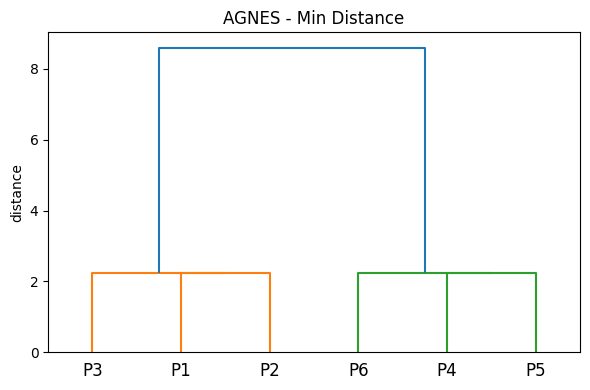

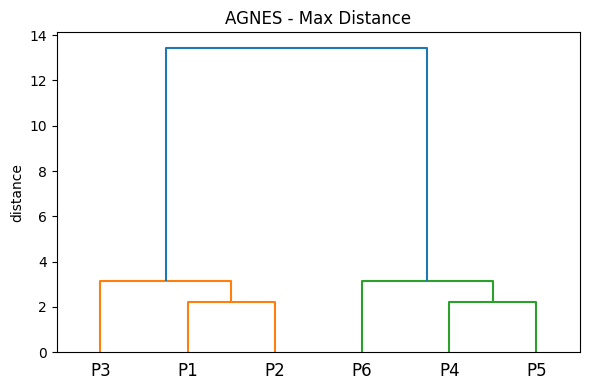

In [3]:
# 使用不同链接方法的AGNES
methods = ['single', 'complete']
method_names = ['Min Distance', 'Max Distance'] 

for i, method in enumerate(methods):
    # 计算链接矩阵
    Z = linkage(data, method=method)
    
    # 绘制树状图
    plt.figure(figsize=(6, 4))
    dendrogram(Z, labels=point_names)
    plt.title(f'AGNES - {method_names[i]}')
    plt.ylabel('distance')
    plt.tight_layout()
    plt.show()

# AGNES算法使用最小距离和最大距离的区别:
## 最小距离（Single Linkage）:
  ### 以两个簇中最近点之间的距离作为簇间距离
  ### 容易形成链状结构，对噪声敏感
  ### 可能产生拉长形状的簇

## 最大距离（Complete Linkage）:
  ### 以两个簇中最远点之间的距离作为簇间距离
  ### 倾向于形成紧凑的球形簇
  ### 对噪声相对不敏感
  ### 通常产生大小更均匀的簇